# Exploratory Data Analysis

## Data Preprocessing

In [19]:
# data preporcessing
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()  

In [20]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month'] = df['job_posted_date'].dt.month

In [21]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [22]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,6
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",8


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

## Number of monthly job postings of top 3 job titles in US

In [24]:
df1 = df.loc[df['job_country'] == 'United States'].copy()

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206292 entries, 0 to 785705
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        206292 non-null  object        
 1   job_title              206292 non-null  object        
 2   job_location           205505 non-null  object        
 3   job_via                206285 non-null  object        
 4   job_schedule_type      205099 non-null  object        
 5   job_work_from_home     206292 non-null  bool          
 6   search_location        206292 non-null  object        
 7   job_posted_date        206292 non-null  datetime64[ns]
 8   job_no_degree_mention  206292 non-null  bool          
 9   job_health_insurance   206292 non-null  bool          
 10  job_country            206292 non-null  object        
 11  salary_rate            25372 non-null   object        
 12  salary_year_avg        15766 non-null   float64  

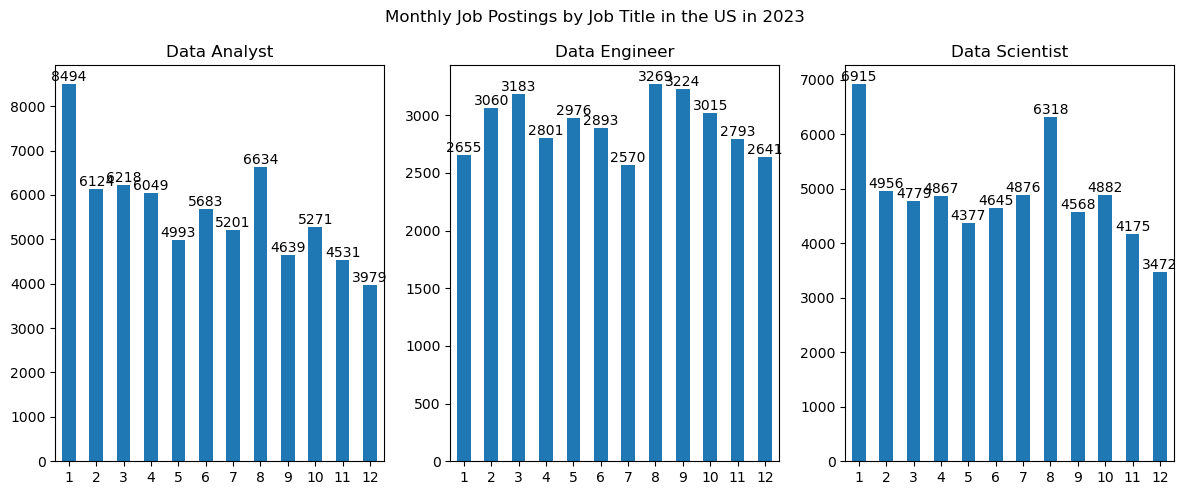

In [26]:
df_DA = df1.loc[df1['job_title_short'] == 'Data Analyst']
df_DE = df1.loc[df1['job_title_short'] == 'Data Engineer']
df_DS = df1.loc[df1['job_title_short'] == 'Data Scientist']
plt.figure(figsize = (12,5))
plt.subplot(1,3,1)
df_DA_graph = df_DA['job_posted_month'].value_counts().sort_index(ascending = True)
df_DA_graph.plot(kind='bar')
for index, value in enumerate(df_DA_graph.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.xlabel('')
plt.title('Data Analyst')
plt.xticks(rotation = 0)
plt.subplot(1,3,2)
df_DE_graph = df_DE['job_posted_month'].value_counts().sort_index(ascending=True)
df_DE_graph.plot(kind='bar')
for index, value in enumerate(df_DE_graph.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.xlabel('')
plt.title('Data Engineer')
plt.xticks(rotation = 0)
plt.subplot(1,3,3)
df_DS_graph = df_DS['job_posted_month'].value_counts().sort_index(ascending=True)
df_DS_graph.plot(kind='bar')
for index, value in enumerate(df_DS_graph.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.xlabel('')
plt.title('Data Scientist')
plt.xticks(rotation = 0)
plt.suptitle('Monthly Job Postings by Job Title in the US in 2023')
plt.tight_layout()

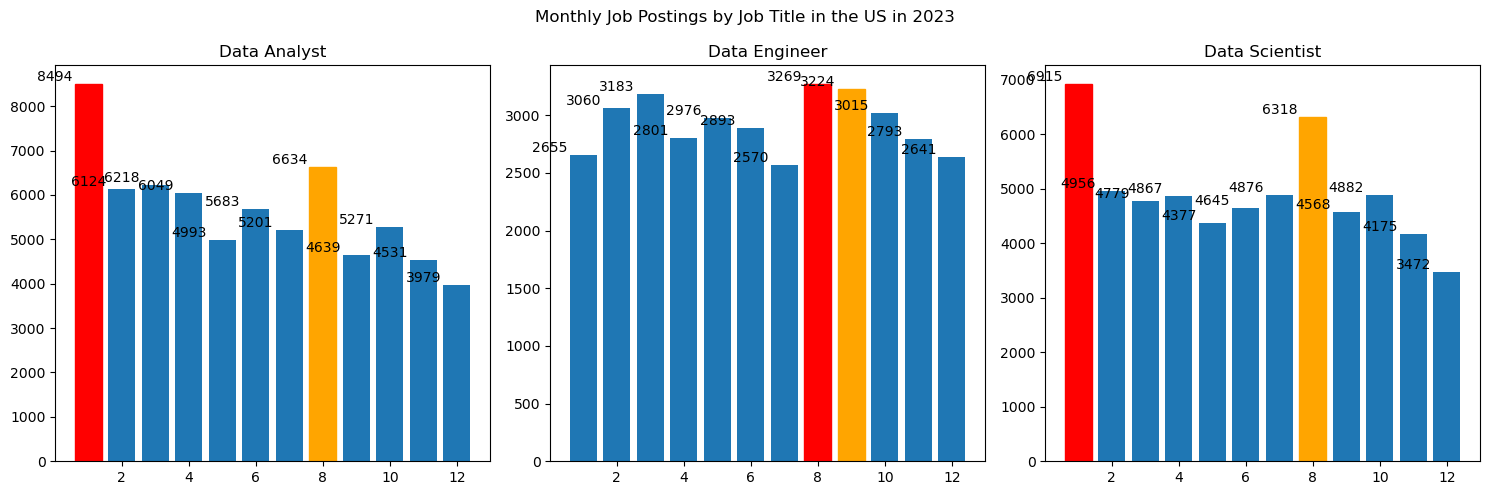

In [27]:
import matplotlib.pyplot as plt

# Assuming df1 is already defined and contains the necessary data

df_DA = df1.loc[df1['job_title_short'] == 'Data Analyst']
df_DE = df1.loc[df1['job_title_short'] == 'Data Engineer']
df_DS = df1.loc[df1['job_title_short'] == 'Data Scientist']

plt.figure(figsize=(15, 5))

# Data Analyst plot
plt.subplot(1, 3, 1)
df_DA_graph = df_DA['job_posted_month'].value_counts().sort_index(ascending=True)
bars = plt.bar(df_DA_graph.index, df_DA_graph.values)
# Highlight the most and second highest bars
highest = df_DA_graph.nlargest(2)
bars[df_DA_graph.index.get_loc(highest.index[0])].set_color('red')
bars[df_DA_graph.index.get_loc(highest.index[1])].set_color('orange')
for index, value in enumerate(df_DA_graph.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.title('Data Analyst')

# Data Engineer plot
plt.subplot(1, 3, 2)
df_DE_graph = df_DE['job_posted_month'].value_counts().sort_index(ascending=True)
bars = plt.bar(df_DE_graph.index, df_DE_graph.values)
# Highlight the most and second highest bars
highest = df_DE_graph.nlargest(2)
bars[df_DE_graph.index.get_loc(highest.index[0])].set_color('red')
bars[df_DE_graph.index.get_loc(highest.index[1])].set_color('orange')
for index, value in enumerate(df_DE_graph.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.title('Data Engineer')

# Data Scientist plot
plt.subplot(1, 3, 3)
df_DS_graph = df_DS['job_posted_month'].value_counts().sort_index(ascending=True)
bars = plt.bar(df_DS_graph.index, df_DS_graph.values)
# Highlight the most and second highest bars
highest = df_DS_graph.nlargest(2)
bars[df_DS_graph.index.get_loc(highest.index[0])].set_color('red')
bars[df_DS_graph.index.get_loc(highest.index[1])].set_color('orange')
for index, value in enumerate(df_DS_graph.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.title('Data Scientist')

plt.suptitle('Monthly Job Postings by Job Title in the US in 2023')
plt.tight_layout()
plt.show()

In [28]:
from scipy import stats
import numpy as np
top_3 = df['job_title_short'].value_counts().nlargest(3)
df_top_3 = df1.loc[df1['job_title_short'].isin(top_3.index)]
lower_bound, upper_bound = np.percentile(df_top_3['salary_year_avg'].dropna(), [1, 99])

# Filter out extreme salary values
df_top_3_cleaned = df_top_3[
    (df_top_3['salary_year_avg'] >= lower_bound) &
    (df_top_3['salary_year_avg'] <= upper_bound)
]

In [29]:
df_top_3_cleaned[(df_top_3_cleaned['job_title_short'] == 'Data Engineer') & (df_top_3_cleaned['job_posted_month']== 8)]['salary_year_avg'].mean()
df_top_3_cleaned[(df_top_3_cleaned['job_title_short'] == 'Data Engineer') & (df_top_3_cleaned['job_posted_month']== 8)]['salary_year_avg'].median()

120000.0

In [30]:
top_3 = df['job_title_short'].value_counts().nlargest(3)

In [31]:
df_top_3 = df1.loc[df1['job_title_short'].isin(top_3.index)]

In [32]:
df_top_3

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '...",11
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",4
11,Data Engineer,Data Engineer,"Colorado Springs, CO (+3 others)",via The Muse,Full-time,False,"Texas, United States",2023-11-03 13:06:51,False,True,United States,None,NaN,NaN,Philips,"[python, qlik]","{'analyst_tools': ['qlik'], 'programming': ['p...",11
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None,10
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['...",7
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}",4
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1


## Mean, Mode, Median of yearly salary of top 3 Job Titles in US

In [33]:
from scipy import stats

# Custom aggregation function to calculate mode
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None

# Aggregating mean, median, and mode
aggregated_data = df_top_3_cleaned.groupby('job_title_short')['salary_year_avg'].agg(
    mean = 'mean', 
    median = 'median',
    mode = mode).reset_index()
print(aggregated_data)

  job_title_short           mean    median      mode
0    Data Analyst   95149.102938   90000.0   90000.0
1   Data Engineer  132139.167792  125000.0  125000.0
2  Data Scientist  136986.045486  129326.0   90000.0


In [34]:
group_by = df_top_3.groupby('job_title_short')['salary_year_avg'].agg(['mean', 'median', mode]).unstack()
group_by

        job_title_short
mean    Data Analyst        94553.964924
        Data Engineer      134226.676753
        Data Scientist     139946.707204
median  Data Analyst        90000.000000
        Data Engineer      125000.000000
        Data Scientist     130000.000000
mode    Data Analyst        90000.000000
        Data Engineer      125000.000000
        Data Scientist      90000.000000
dtype: float64

In [37]:
lower_bound, upper_bound = np.percentile(df_top_3['salary_year_avg'].dropna(), [1, 99])

# Filter out extreme salary values
df_top_3_cleaned = df_top_3[
    (df_top_3['salary_year_avg'] >= lower_bound) &
    (df_top_3['salary_year_avg'] <= upper_bound)
]

C:\Temp\ipykernel_9164\3677284109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_3_cleaned, x='salary_year_avg', y='job_title_short', palette='rainbow', ax=ax[0])


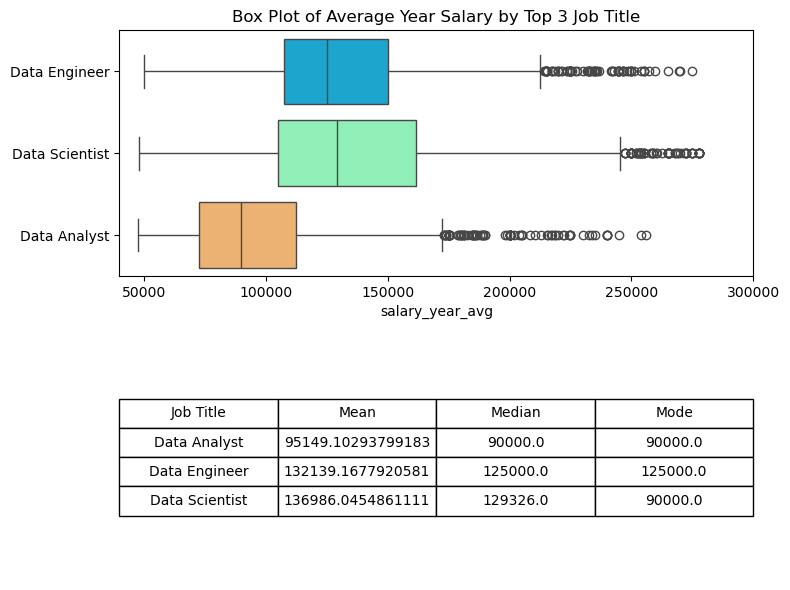

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

sns.boxplot(data=df_top_3_cleaned, x='salary_year_avg', y='job_title_short', palette='rainbow', ax=ax[0])
ax[0].set_ylabel('')
ax[0].set_title('Box Plot of Average Year Salary by Top 3 Job Title')
ax[0].set_xlim(40000, 300000)

# Adding a table with mean, median, mode, Q1, and Q3
table_data = aggregated_data.values
columns = ['Job Title', 'Mean', 'Median', 'Mode']
table = ax[1].table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
ax[1].axis('off')  # Hide the axis for the table subplot

plt.tight_layout()
plt.show()

## Top demanding skills of Data Analyst, Data Engineer, Data Scientist in US

In [41]:
df_top_3_exp = df_top_3.explode('job_skills')

In [42]:
DA_skill = df_top_3_exp.loc[df_top_3_exp['job_title_short'] == 'Data Analyst']['job_skills'].value_counts().nlargest(5)
DE_skill = df_top_3_exp.loc[df_top_3_exp['job_title_short'] == 'Data Engineer']['job_skills'].value_counts().nlargest(5)
DS_skill = df_top_3_exp.loc[df_top_3_exp['job_title_short'] == 'Data Scientist']['job_skills'].value_counts().nlargest(5)

In [52]:
DA_skill = DA_skill.to_frame()

C:\Temp\ipykernel_9164\1879055856.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = DA_skill, x = 'count', y= 'job_skills',  palette='Blues_r', legend = False)


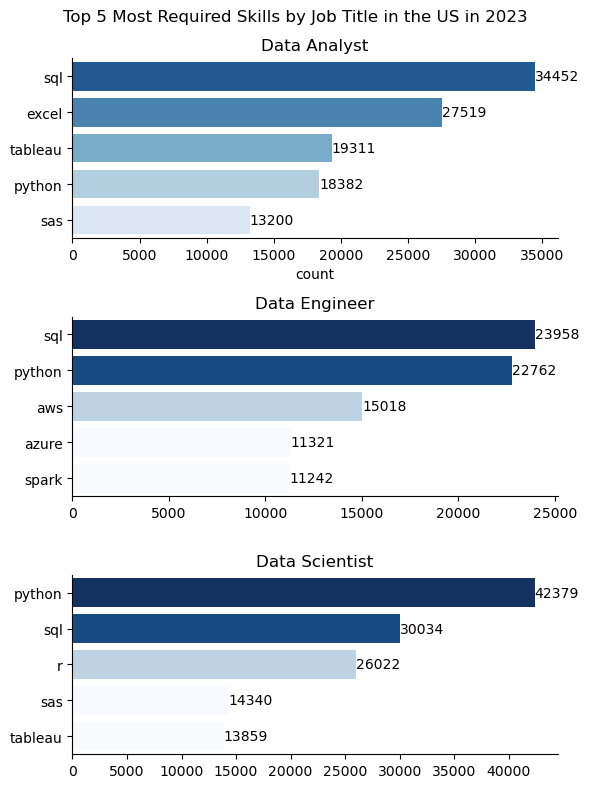

In [56]:
plt.figure(figsize=(6, 8))

# Data Analyst
plt.subplot(3, 1, 1)
sns.barplot(data = DA_skill, x = 'count', y= 'job_skills',  palette='Blues_r', legend = False)
sns.despine()
plt.title('Data Analyst')
plt.ylabel('')
for index, value in enumerate(DA_skill['count']):
    plt.text(value, index, f'{value}', va='center')

# Data Engineer
plt.subplot(3, 1, 2)
sns.barplot(x=DE_skill.values, y=DE_skill.index,hue =DE_skill.values, palette='Blues', legend = False)
sns.despine()
plt.title('Data Engineer')
plt.ylabel('')
for index, value in enumerate(DE_skill.values):
    plt.text(value, index, f'{value}', va='center')

# Data Scientist
plt.subplot(3, 1, 3)
sns.barplot(x=DS_skill.values, y=DS_skill.index, hue =DE_skill.values, palette='Blues', legend = False)
sns.despine()
plt.title('Data Scientist')
plt.ylabel('')
for index, value in enumerate(DS_skill.values):
    plt.text(value, index, f'{value}', va='center')
plt.suptitle('Top 5 Most Required Skills by Job Title in the US in 2023')

plt.tight_layout()
plt.show()